In [6]:
from bdshare import get_basic_hist_data
import matplotlib.pyplot as plt
import pandas as pd
import time 
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline 
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import matplotlib.dates as mdates
import datetime as dt
import time 
import os
from os import listdir
from os.path import isfile, join
import warnings
warnings.simplefilter('ignore')
#import cufflinks as cf
plt.style.use('fivethirtyeight')
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse

In [7]:
df=pd.read_csv('E:\\BD Stocks\\BD Stocks.csv')
df['Column1']

0       1JANATAMF
1      1STPRIMFMF
2        AAMRANET
3       AAMRATECH
4        ABB1STMF
          ...    
345      UNIONCAP
346    WMSHIPYARD
347           YPL
348    ZAHEENSPIN
349      ZAHINTEX
Name: Column1, Length: 350, dtype: object

In [8]:
stock_not_downloaded = []
missing_stocks = []

In [9]:
folder='E:\\BD\\'
def save_data(folder,ticker,s,e):
    try:
        print("Got Data From :",ticker)
        df=get_basic_hist_data(s,e,i,index='date')
        time.sleep(2)
        if df.empty:
            stocks_not_downloaded.append(ticker)
        the_file = folder + ticker +'.csv'
        
        print(the_file,'Saved')
        df.to_csv(the_file)
    except Exception as ex:
        stock_not_downloaded.append(ticker)
        print(ex , ticker)

In [10]:
for i in df['Column1'][0:3].values:
    save_data(folder,i,'2020-01-01','2022-05-05')
print('Finished')

Got Data From : 1JANATAMF
E:\BD\1JANATAMF.csv Saved
Got Data From : 1STPRIMFMF
E:\BD\1STPRIMFMF.csv Saved
Got Data From : AAMRANET
E:\BD\AAMRANET.csv Saved
Finished


In [11]:
stock_not_downloaded

[]

In [12]:
path='E:\\BD'
files=[x for x in listdir(path) if isfile(join(path, x))]
tickers=[os.path.splitext(x)[0] for x in files]
tickers[0:351]

['1JANATAMF',
 '1STPRIMFMF',
 'AAMRANET',
 'AAMRATECH',
 'ABB1STMF',
 'ABBANK',
 'ACFL',
 'ACI',
 'ACIFORMULA',
 'ACMELAB',
 'ACTIVEFINE',
 'ADNTEL',
 'ADVENT',
 'AFCAGRO',
 'AFTABAUTO',
 'AGNISYSL',
 'AGRANINS',
 'AIBL1STIMF',
 'AIL',
 'AL-HAJTEX',
 'ALARABANK',
 'ALIF',
 'AMANFEED',
 'AMBEEPHA',
 'AMCL(PRAN)',
 'ANLIMAYARN',
 'ANWARGALV',
 'AOL',
 'APEXFOODS',
 'APEXFOOT',
 'APEXSPINN',
 'APEXTANRY',
 'APOLOISPAT',
 'ARAMIT',
 'ARAMITCEM',
 'ARGONDENIM',
 'ASIAINS',
 'ASIAPACINS',
 'ATCSLGF',
 'ATLASBANG',
 'AZIZPIPES',
 'BANGAS',
 'BANKASIA',
 'BARKAPOWER',
 'BATASHOE',
 'BATBC',
 'BAYLEASING',
 'BBS',
 'BBSCABLES',
 'BDAUTOCA',
 'BDCOM',
 'BDFINANCE',
 'BDLAMPS',
 'BDTHAI',
 'BEACONPHAR',
 'BENGALWTL',
 'BERGERPBL',
 'BEXIMCO',
 'BGIC',
 'BNICL',
 'BPML',
 'BPPL',
 'BRACBANK',
 'BSC',
 'BSCCL',
 'BSRMLTD',
 'BSRMSTEEL',
 'BXPHARMA',
 'CAPMBDBLMF',
 'CAPMIBBLMF',
 'CENTRALINS',
 'CENTRALPHL',
 'CITYBANK',
 'CITYGENINS',
 'CONFIDCEM',
 'CONTININS',
 'COPPERTECH',
 'CROWNCEMNT',
 'CRY

In [13]:
def update_data(folder,ticker,e):
    try:
        cur_data=pd.read_csv(folder+ticker+'.csv',index_col='date')
        s=cur_data.index.max()
        s = pd.to_datetime(s) + datetime.timedelta(days=1)
        update=get_basic_hist_data(s,e,ticker,index='date')
        frames=[cur_data,update]
        result = pd.concat(frames)
        result.to_csv(folder+ticker+'.csv')
        print("Data has been Updated :",ticker)
    except Exception as ex:
        print(ex,ticker)

In [14]:
for stock in tickers[0:3]:
    update_data(folder,stock,'2022-05-05')
print("Finished")

list index out of range 1JANATAMF
list index out of range 1STPRIMFMF
list index out of range AAMRANET
Finished


In [15]:
# Add Daily Return to dataframe
def add_daily_return_to_df(df,ticker):
    df['Daily_return']=(df['close']/df['close'].shift(1))-1
    df.to_csv('E:\\BD\\nn\\'+ ticker +'.csv')
    return df

In [16]:
def add_cum_return_to_df(ticker):
    df =pd.read_csv('E:\\BD\\nn\\'+ticker+'.csv',index_col='date')
    df['cum_return'] = (1 + df['Daily_return']).cumprod()
    df.to_csv('E:\\BD\\nn\\'+ ticker +'.csv')
    return df
#cumsum= (x1,x2,x2) to (x1+x2)==> (x1+x2)+x3 cumpod=(x1*x2)==>(x1*x2)*x3
add_cum_return_to_df('1JANATAMF')

,open,high,low,close,volume,Daily_return,cum_return
date,,,,,,,
2020-05-31,4.1,4.1,4.1,4.1,44681,NaN,NaN
2020-06-01,4.1,4.1,4.1,4.1,6219,0.000000,1.000000
2020-06-02,4.1,4.1,4.1,4.1,10849,0.000000,1.000000
2020-06-03,4.1,4.1,4.1,4.1,200,0.000000,1.000000
2020-06-04,4.1,4.1,4.1,4.1,22050,0.000000,1.000000
...,...,...,...,...,...,...,...
2022-04-25,6.4,6.5,6.3,6.4,989218,0.000000,1.560976
2022-04-26,6.4,6.4,6.3,6.4,288945,0.000000,1.560976
2022-04-27,6.4,6.4,6.3,6.3,332014,-0.015625,1.536585


In [17]:
ticker=df['Column1'].values
ticker

array(['1JANATAMF', '1STPRIMFMF', 'AAMRANET', 'AAMRATECH', 'ABB1STMF',
       'ACFL', 'ACI', 'ACIFORMULA', 'ACMELAB', 'ADNTEL', 'AFTABAUTO',
       'AGRANINS', 'AIBL1STIMF', 'AIL', 'ALARABANK', 'AMANFEED',
       'AMBEEPHA', 'AMCL(PRAN)', 'ANWARGALV', 'AOL', 'APEXFOODS',
       'APEXFOOT', 'APEXSPINN', 'APEXTANRY', 'ARAMIT', 'ARGONDENIM',
       'ASIAINS', 'ASIAPACINS', 'ATCSLGF', 'BANKASIA', 'BARKAPOWER',
       'BATASHOE', 'BATBC', 'BAYLEASING', 'BBSCABLES', 'BDCOM',
       'BDFINANCE', 'BDLAMPS', 'BEACONPHAR', 'BERGERPBL', 'BEXIMCO',
       'BGIC', 'BNICL', 'BPML', 'BPPL', 'BRACBANK', 'BSC', 'BSCCL',
       'BSRMLTD', 'BSRMSTEEL', 'BXPHARMA', 'CAPMBDBLMF', 'CAPMIBBLMF',
       'CENTRALINS', 'CITYBANK', 'CITYGENINS', 'CONFIDCEM', 'CONTININS',
       'CROWNCEMNT', 'CRYSTALINS', 'CVOPRL', 'DBH', 'DBH1STMF',
       'DELTALIFE', 'DESCO', 'DGIC', 'DHAKABANK', 'DHAKAINS', 'DOREENPWR',
       'DSSL', 'DUTCHBANGL', 'EASTERNINS', 'EASTLAND', 'EASTRNLUB', 'EBL',
       'EBL1STMF', 'EBLNRBMF', 

In [18]:
for x in df['Column1'][0:352].values:
    try:
        print("Working on :", x)
        new_df =pd.read_csv(folder+x+'.csv',index_col='date')
        #new_df=new_df.drop(['Unnamed: 0'],axis=1)
        new_df=add_daily_return_to_df(new_df,x)
    except Exception as ex:
        print(ex)

Working on : 1JANATAMF
Working on : 1STPRIMFMF
Working on : AAMRANET
Working on : AAMRATECH
Working on : ABB1STMF
Working on : ACFL
Working on : ACI
Working on : ACIFORMULA
Working on : ACMELAB
Working on : ADNTEL
Working on : AFTABAUTO
Working on : AGRANINS
Working on : AIBL1STIMF
Working on : AIL
Working on : ALARABANK
Working on : AMANFEED
Working on : AMBEEPHA
Working on : AMCL(PRAN)
Working on : ANWARGALV
Working on : AOL
Working on : APEXFOODS
Working on : APEXFOOT
Working on : APEXSPINN
Working on : APEXTANRY
Working on : ARAMIT
Working on : ARGONDENIM
Working on : ASIAINS
Working on : ASIAPACINS
Working on : ATCSLGF
Working on : BANKASIA
Working on : BARKAPOWER
Working on : BATASHOE
Working on : BATBC
Working on : BAYLEASING
Working on : BBSCABLES
Working on : BDCOM
Working on : BDFINANCE
Working on : BDLAMPS
Working on : BEACONPHAR
Working on : BERGERPBL
Working on : BEXIMCO
Working on : BGIC
Working on : BNICL
Working on : BPML
Working on : BPPL
Working on : BRACBANK
Working 

In [19]:
for x in df['Column1'][0:352].values:
    try:
        print("Working on :", x)
        #new_df=new_df.drop(['Unnamed: 0'],axis=1)
        new_df=add_cum_return_to_df(x)
    except Exception as ex:
        print(ex)

Working on : 1JANATAMF
Working on : 1STPRIMFMF
Working on : AAMRANET
Working on : AAMRATECH
Working on : ABB1STMF
Working on : ACFL
Working on : ACI
Working on : ACIFORMULA
Working on : ACMELAB
Working on : ADNTEL
Working on : AFTABAUTO
Working on : AGRANINS
Working on : AIBL1STIMF
Working on : AIL
Working on : ALARABANK
Working on : AMANFEED
Working on : AMBEEPHA
Working on : AMCL(PRAN)
Working on : ANWARGALV
Working on : AOL
Working on : APEXFOODS
Working on : APEXFOOT
Working on : APEXSPINN
Working on : APEXTANRY
Working on : ARAMIT
Working on : ARGONDENIM
Working on : ASIAINS
Working on : ASIAPACINS
Working on : ATCSLGF
Working on : BANKASIA
Working on : BARKAPOWER
Working on : BATASHOE
Working on : BATBC
Working on : BAYLEASING
Working on : BBSCABLES
Working on : BDCOM
Working on : BDFINANCE
Working on : BDLAMPS
Working on : BEACONPHAR
Working on : BERGERPBL
Working on : BEXIMCO
Working on : BGIC
Working on : BNICL
Working on : BPML
Working on : BPPL
Working on : BRACBANK
Working 

In [20]:
def get_valid_dates(df,sdate, edate):
    try:
        mask = (df['date'] >= sdate) & (df['date'] <= edate) 
        sm_df = df.loc[mask]
        sm_df = sm_df.set_index(['date'])

        # Get smallest date that matches
        sm_date = sm_df.index.min()
        last_date = sm_df.index.max()
    except Exception as ex:
        print(ex)
    else:
        return sm_date,last_date

In [21]:
def Growth_between_dates(ticker, sdate, edate):
    try:
        # Gets the Adj Close price for 1st & last date
        df=pd.read_csv('E:\\BD\\'+ticker+'.csv')
        s_date,e_date=get_valid_dates(df,sdate,edate)
        df=df.set_index(['date'])
        start_val = df.loc[s_date,'close']
        end_val = df.loc[e_date,'close']
        roi = ((end_val - start_val) / start_val)
    except Exception as ex:
        print('Error :',ex)
    else:
        return roi
        

In [22]:
def get_growth(sdate,edate):
    Growth=[]
    ticker=[]
    for x in df['Column1'][0:352].values:
        try:
            s=Growth_between_dates(x,sdate,edate)
        except Exception as ex:
            print(ex)
        else:
            Growth.append(s)
            ticker.append(x)
            print(x," : ",s)
    return pd.DataFrame({'Ticker':ticker, 'Growth' : Growth})

In [23]:
growth=get_growth('2020-03-15','2022-04-14')
growth=growth.sort_values(by=['Growth'],ascending=False)[1:30]
growth

1JANATAMF  :  0.5609756097560978
1STPRIMFMF  :  0.43697478991596644
AAMRANET  :  0.2379518072289156
AAMRATECH  :  0.5859030837004405
ABB1STMF  :  0.2558139534883722
ACFL  :  0.46486486486486495
ACI  :  0.5634657836644593
ACIFORMULA  :  0.8499440089585666
ACMELAB  :  0.4607508532423207
ADNTEL  :  1.0123839009287927
AFTABAUTO  :  0.11965811965811969
AGRANINS  :  1.7085714285714284
AIBL1STIMF  :  0.2647058823529412
AIL  :  0.7228464419475656
ALARABANK  :  0.815068493150685
AMANFEED  :  0.5370370370370371
AMBEEPHA  :  0.1510242972844211
AMCL(PRAN)  :  0.7828663793103448
ANWARGALV  :  4.27206946454414
AOL  :  1.5666666666666667
APEXFOODS  :  0.7118780096308188
APEXFOOT  :  0.3167048054919908
APEXSPINN  :  0.046897546897546896
APEXTANRY  :  0.41089566020313956
ARAMIT  :  0.5054015969938938
ARGONDENIM  :  -0.05759162303664928
ASIAINS  :  3.284023668639054
ASIAPACINS  :  1.7089947089947093
ATCSLGF  :  0.4202898550724638
BANKASIA  :  0.1812499999999999
BARKAPOWER  :  0.23115577889447245
BATASHO

CENTRALPHL  :  0.21008403361344538
COPPERTECH  :  0.8038277511961726
DACCADYE  :  5.482758620689656
DAFODILCOM  :  0.38195777351247595
DELTASPINN  :  1.6571428571428573
DESHBANDHU  :  0.9423076923076922
DOMINAGE  :  0.47333333333333344
DSHGARME  :  0.5009881422924901
ECABLES  :  -0.04519774011299439
EIL  :  0.9599999999999999
ETL  :  0.253012048192771
FARCHEM  :  0.22680412371134034
FASFIN  :  0.44736842105263164
FINEFOODS  :  -0.0070422535211268605
FUWANGCER  :  1.3432835820895521
FUWANGFOOD  :  0.8793103448275863
GEMINISEA  :  2.5671025464556085
GHAIL  :  0.05487804878048794
GHCL  :  0.06031746031746027
GOLDENSON  :  2.074074074074074
GQBALLPEN  :  0.6772727272727274
HAKKANIPUL  :  -0.23803191489361708
HFL  :  0.2784810126582277
IBP  :  -0.06806282722513092
ILFSL  :  0.27272727272727254
INTECH  :  0.4129353233830844
ISNLTD  :  0.27058823529411774
ITC  :  0.18466898954703836
KAY&QUE  :  0.2227556409025443
KBPPWBIL  :  0.9672131147540984
KEYACOSMET  :  2.04
KPPL  :  -0.4748603351955306

,Ticker,Growth
248,TAMIJTEX,17.583333
174,PAPERPROC,13.954545
40,BEXIMCO,10.271318
89,FORTUNE,6.759494
284,DACCADYE,5.482759
196,PROVATIINS,4.697917
42,BNICL,4.676471
18,ANWARGALV,4.272069
332,SALVOCHEM,4.257426
36,BDFINANCE,4.194805


In [24]:
growth

,Ticker,Growth
248,TAMIJTEX,17.583333
174,PAPERPROC,13.954545
40,BEXIMCO,10.271318
89,FORTUNE,6.759494
284,DACCADYE,5.482759
196,PROVATIINS,4.697917
42,BNICL,4.676471
18,ANWARGALV,4.272069
332,SALVOCHEM,4.257426
36,BDFINANCE,4.194805


In [25]:
#Get Means Between Dates
def get_data(ticker):
    df=pd.read_csv('E:\\BD\\nn\\'+ticker+'.csv')
    return df

In [26]:
#Get Means Between Dates
def get_mean_between_dates(ticker,sdate,edate):
    df=get_data(ticker)
    mask=(df['date'] > sdate) & (df['date'] <= edate)
    #print(df.loc[mask]["close"].mean())
    return df.loc[mask]["close"].mean()

#Get standard deviasion 
def get_std_between_dates(ticker,sdate,edate):
    df=get_data(ticker)
    mask=(df['date'] > sdate) & (df['date'] <= edate)
    #print(df.loc[mask]["close"].std())
    return df.loc[mask]["close"].std()

#get Coefficient of Variation Betwwen dates
def get_cov_between_dates(df, sdate, edate):
    mean = get_mean_between_dates(df, sdate, edate)
    sd = get_std_between_dates(df, sdate, edate)
    return sd / mean

def roi_between_dates(ticker,sdate, edate):
    
    try:
        # Gets the Adj Close price for 1st & last date
        s=Growth_between_dates(ticker,sdate,edate)
    except Exception as ex:
        print("Data Corrupted",ex)
    else:
        return s

In [28]:
sdate='2020-03-15'
edate='2022-05-05'
for x in df['Column1'][17:20].values:
    print(x)
    print("Adj Close Mean :", get_mean_between_dates(x, sdate, edate))
    print("Adj Close Standard Deviation :", get_std_between_dates(x, sdate, edate))
    print("Adj Close Coefficient of Variation :", get_cov_between_dates(x, sdate, edate))
    print("Return on Investment since 2017:", roi_between_dates(x, sdate, edate))

AMCL(PRAN)
Adj Close Mean : 229.3573221757322
Adj Close Standard Deviation : 58.47450141083796
Adj Close Coefficient of Variation : 0.2549493552511707
Return on Investment since 2017: 0.6745689655172414
ANWARGALV
Adj Close Mean : 223.24832635983262
Adj Close Standard Deviation : 136.93924507626286
Adj Close Coefficient of Variation : 0.6133942740316163
Return on Investment since 2017: 4.40520984081042
AOL
Adj Close Mean : 46.83351351351351
Adj Close Standard Deviation : 7.961081559693249
Adj Close Coefficient of Variation : 0.16998685262843094
Return on Investment since 2017: 1.4466666666666668


In [29]:
#Get cofficient of variation over defined period        
def cv_df(sdate,edate):
    ticker=[]
    cov=[]
    roi=[]
    for x in df['Column1'][0:350].values:
        print('working on :',x)
        try:
            y=get_cov_between_dates(x,sdate,edate)
            z=Growth_between_dates(x,sdate,edate)
        except Exception as ex:
            print(ex)
        else:
            ticker.append(x)
            cov.append(y)
            roi.append(z)
    return pd.DataFrame({'Ticker':ticker, 'Cov' : cov, 'ROI' : roi})
    

In [31]:
market_df=cv_df('2020-03-15','2022-05-05')
tt=market_df.sort_values(by=['ROI'],ascending=False)[0:20]
tt

working on : 1JANATAMF
working on : 1STPRIMFMF
working on : AAMRANET
working on : AAMRATECH
working on : ABB1STMF
working on : ACFL
working on : ACI
working on : ACIFORMULA
working on : ACMELAB
working on : ADNTEL
working on : AFTABAUTO
working on : AGRANINS
working on : AIBL1STIMF
working on : AIL
working on : ALARABANK
working on : AMANFEED
working on : AMBEEPHA
working on : AMCL(PRAN)
working on : ANWARGALV
working on : AOL
working on : APEXFOODS
working on : APEXFOOT
working on : APEXSPINN
working on : APEXTANRY
working on : ARAMIT
working on : ARGONDENIM
working on : ASIAINS
working on : ASIAPACINS
working on : ATCSLGF
working on : BANKASIA
working on : BARKAPOWER
working on : BATASHOE
working on : BATBC
working on : BAYLEASING
working on : BBSCABLES
working on : BDCOM
working on : BDFINANCE
working on : BDLAMPS
working on : BEACONPHAR
working on : BERGERPBL
working on : BEXIMCO
working on : BGIC
working on : BNICL
working on : BPML
working on : BPPL
working on : BRACBANK
working 

,Ticker,Cov,ROI
328,RAHIMAFOOD,0.338323,inf
248,TAMIJTEX,0.433613,17.530303
174,PAPERPROC,0.357713,12.647727
40,BEXIMCO,0.614010,10.503876
89,FORTUNE,0.815850,6.759494
284,DACCADYE,0.540384,5.517241
332,SALVOCHEM,0.642327,4.495050
18,ANWARGALV,0.613394,4.405210
36,BDFINANCE,0.489483,4.272727
42,BNICL,0.527153,4.064706


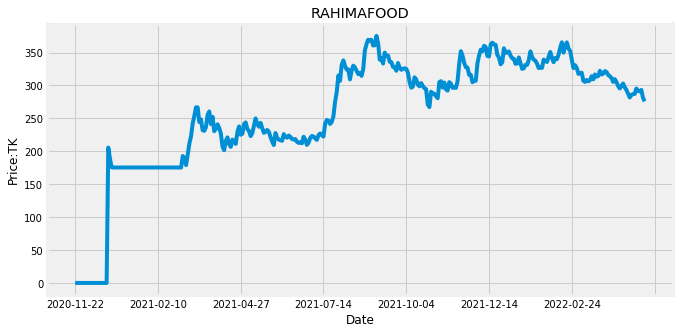

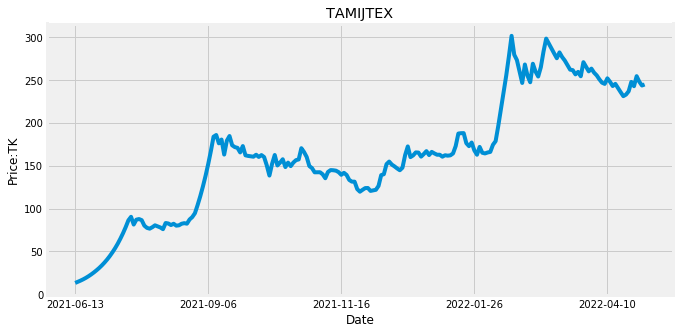

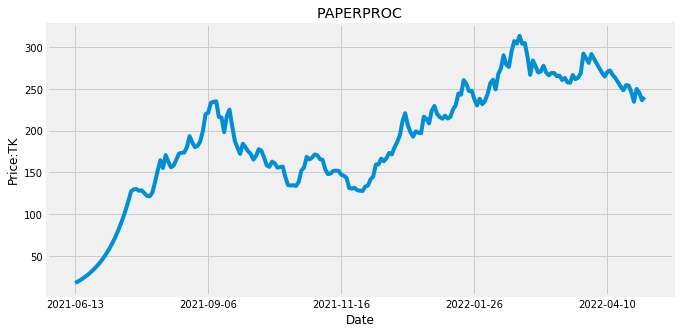

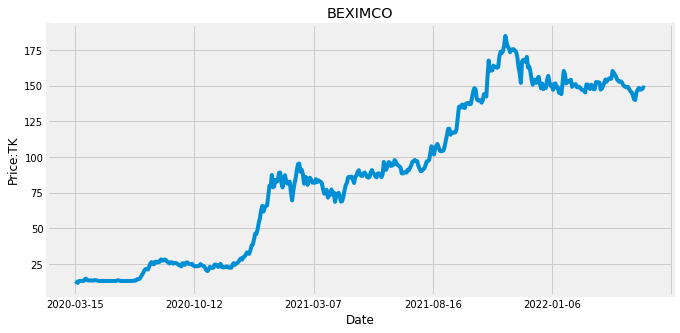

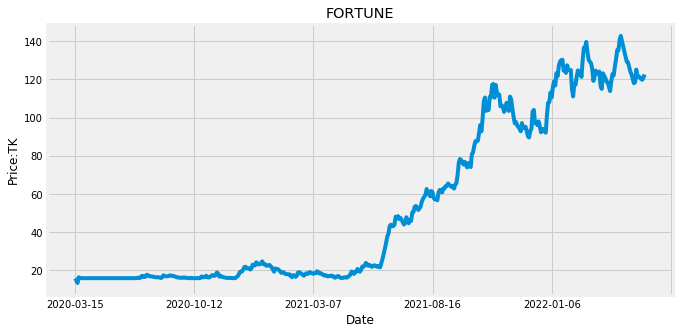

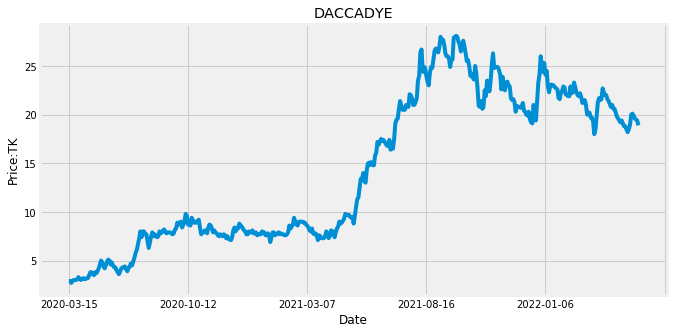

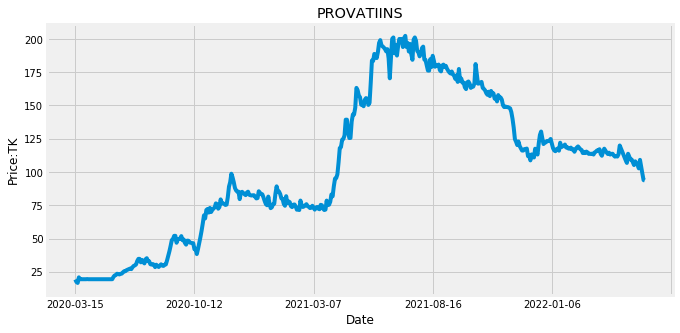

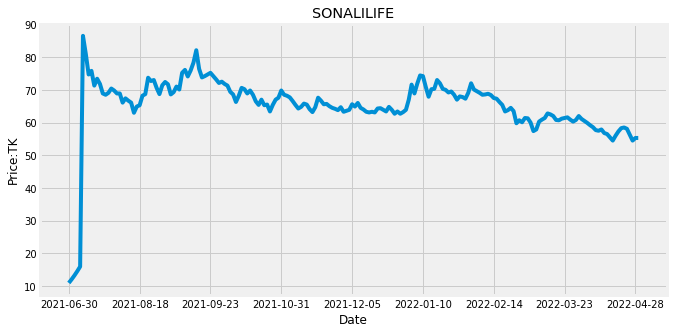

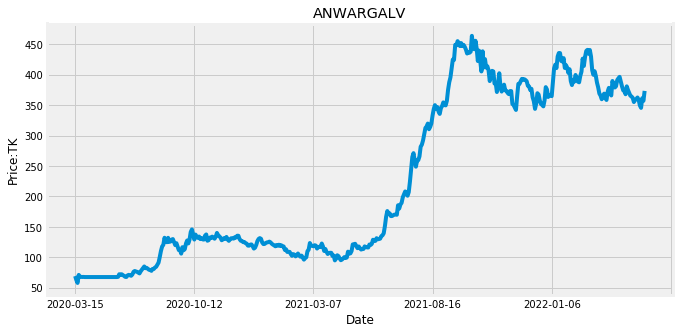

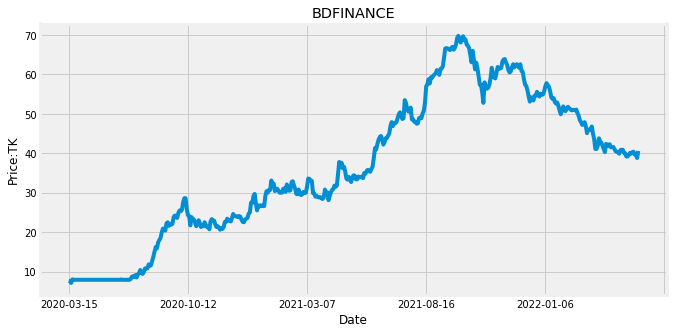

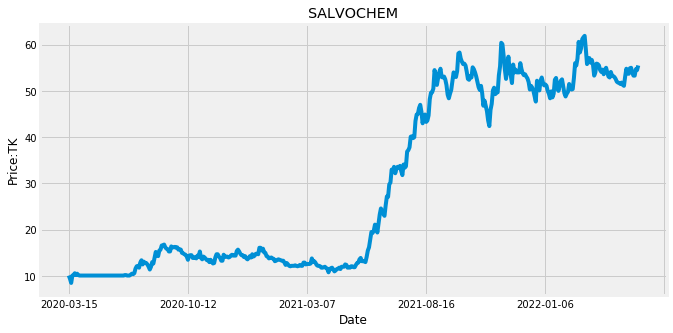

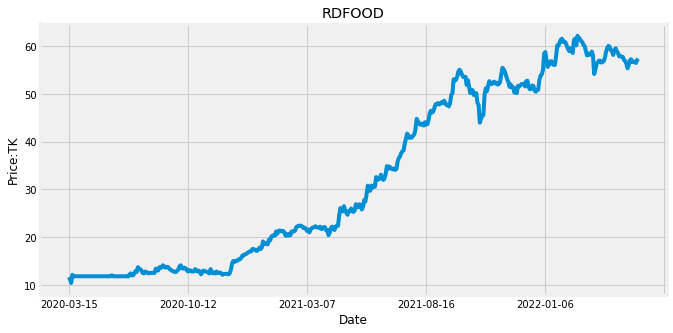

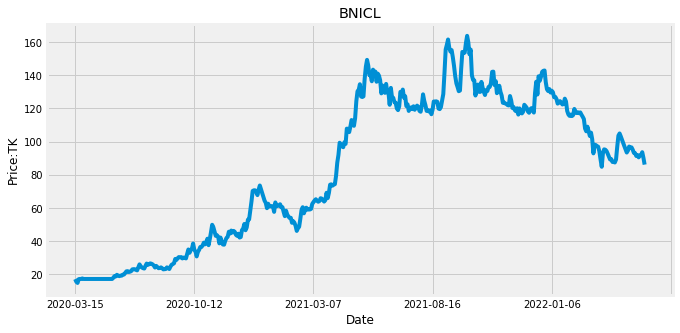

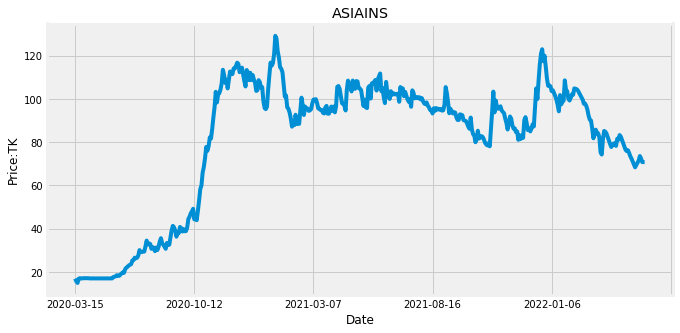

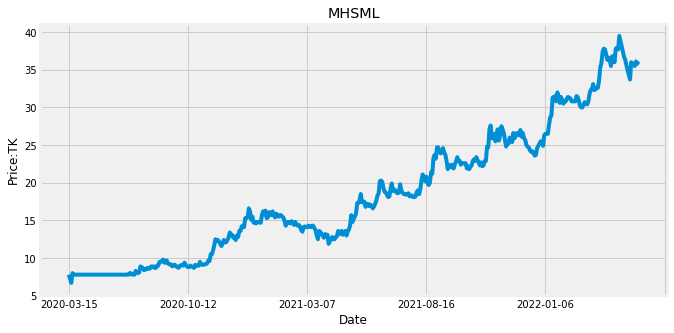

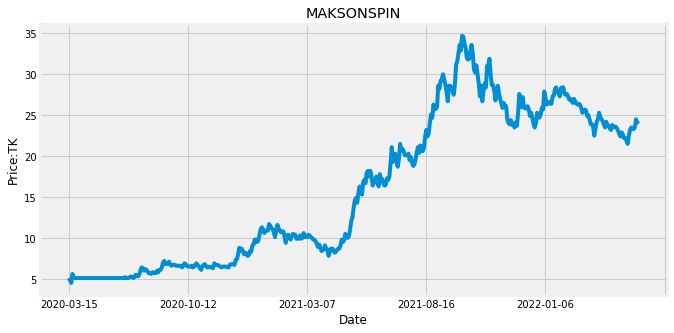

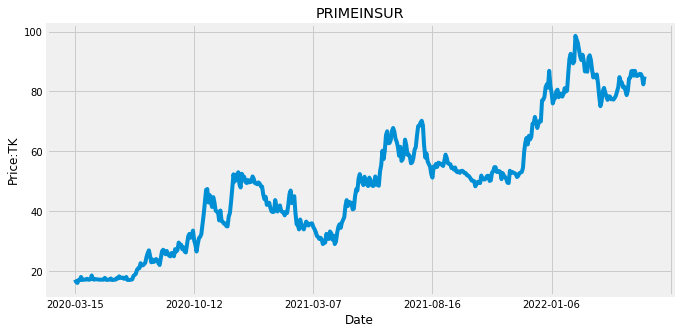

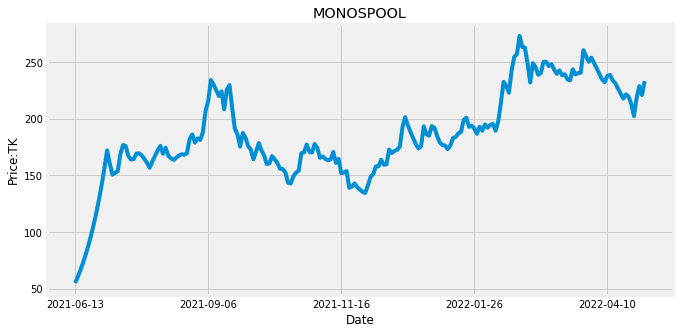

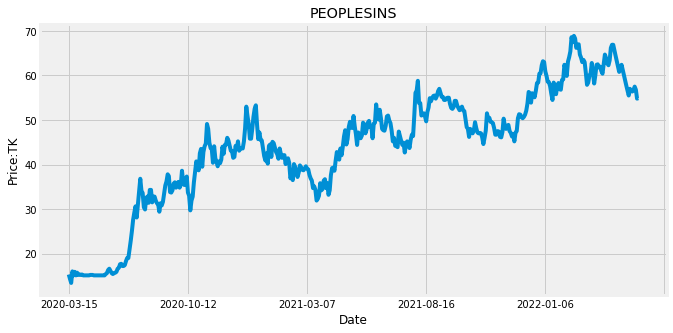

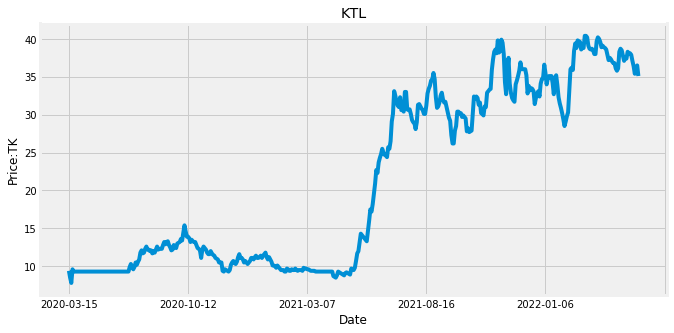

In [32]:
cov=pd.read_csv('E:\\cov.csv')
cov['Ticker'].values
for i in cov['Ticker'][0:30].values:
    df1=pd.read_csv('E:\\BD\\nn\\'+i+'.csv',index_col='date')
    df1['close'].plot(figsize=(10,5))
    plt.xlabel('Date')
    plt.ylabel('Price:TK')
    plt.title(i)
    plt.show()


In [33]:
l=tt[(tt.ROI<=18) & (tt.Cov<=0.5)]
l

,Ticker,Cov,ROI
248,TAMIJTEX,0.433613,17.530303
174,PAPERPROC,0.357713,12.647727
36,BDFINANCE,0.489483,4.272727
235,SONALILIFE,0.151755,4.027273
193,PRIMEINSUR,0.430319,3.970760
316,MHSML,0.471958,3.628205
150,MONOSPOOL,0.215349,3.236364
26,ASIAINS,0.375891,3.189349
38,BEACONPHAR,0.498808,3.184295
270,AL-HAJTEX,0.464347,3.011321


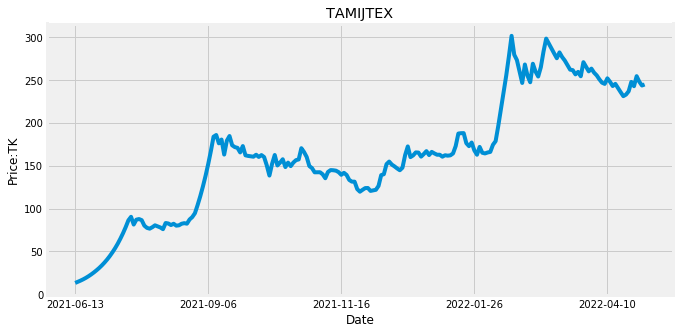

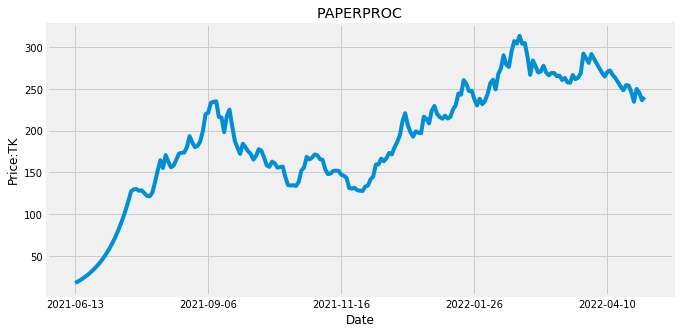

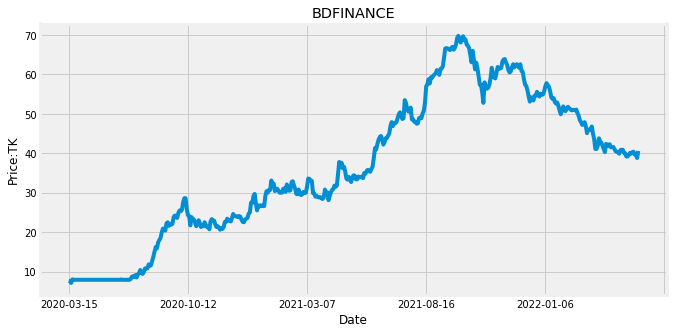

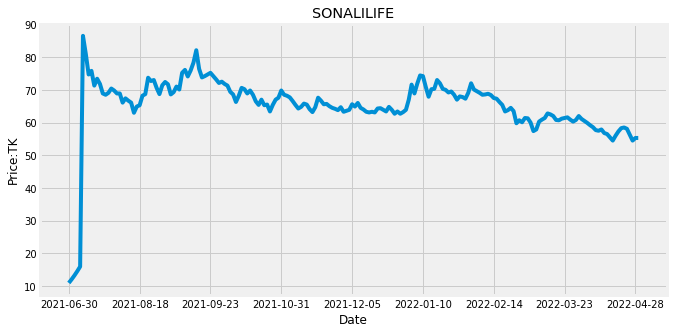

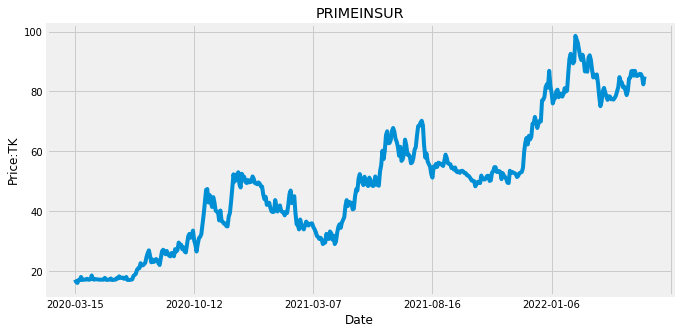

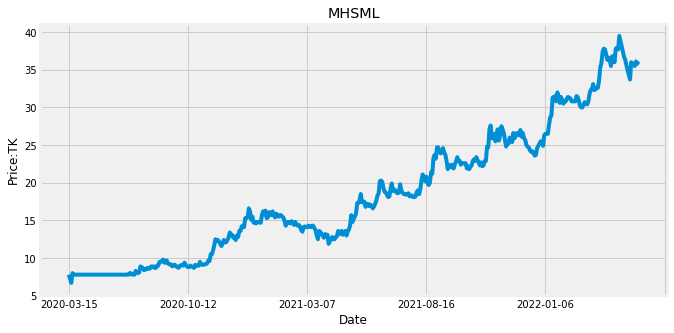

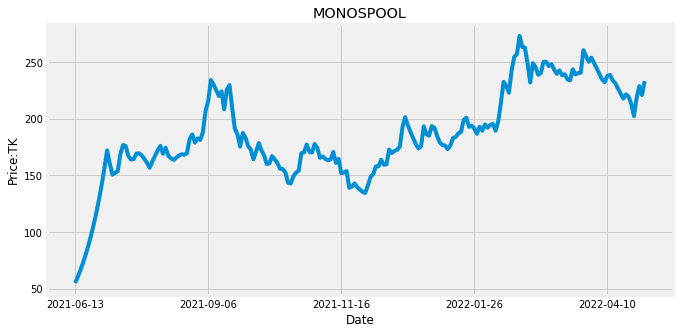

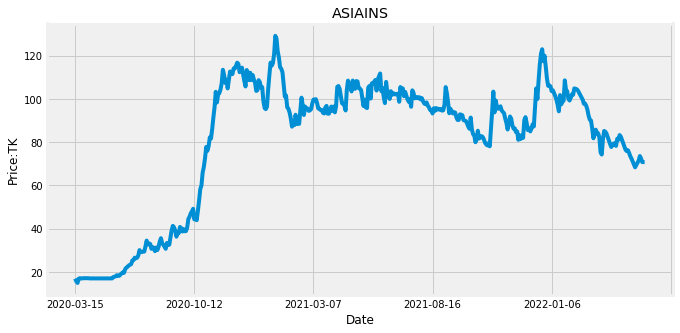

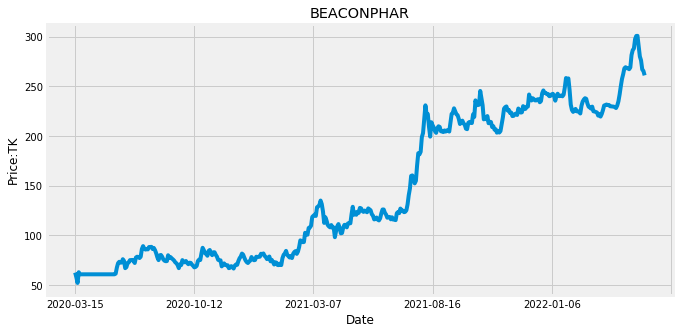

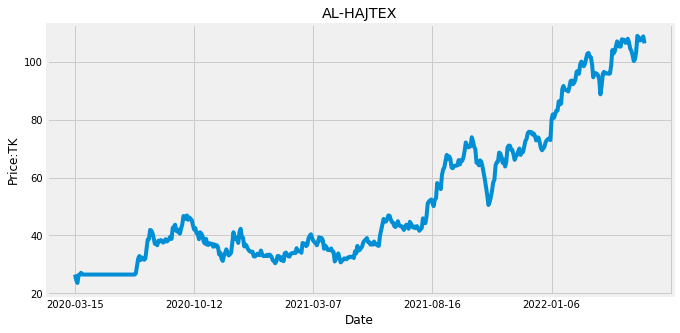

In [34]:
l['Ticker'].values
for i in l['Ticker'].values:
    df1=pd.read_csv('E:\\BD\\nn\\'+i+'.csv',index_col='date')
    df1['close'].plot(figsize=(10,5))
    plt.xlabel('Date')
    plt.ylabel('Price:TK')
    plt.title(i)
    plt.show()


In [35]:
my_stocks=['MHSML','PAPERPROC','RDFOOD','PEOPLESINS','PRIMEINSUR']
my_stocks

['MHSML', 'PAPERPROC', 'RDFOOD', 'PEOPLESINS', 'PRIMEINSUR']

In [36]:
def marge_df_by_col_name(col_name,sdate,edate,*tickers):
    mult_df=pd.DataFrame()
    for x in tickers:
        df=pd.read_csv('E:\\BD\\nn\\'+x+'.csv',index_col='date')
        mask = (df.index >= sdate) & (df.index <= edate)
        mult_df[x]=df.loc[mask][col_name]
    return mult_df
mult_df=marge_df_by_col_name('close','2021-06-13','2022-04-14',*my_stocks)
mult_df

,MHSML,PAPERPROC,RDFOOD,PEOPLESINS,PRIMEINSUR
date,,,,,
2021-06-13,19.3,17.6,32.0,47.7,62.8
2021-06-14,18.8,19.3,32.3,47.6,63.8
2021-06-15,18.7,21.2,33.3,48.7,66.8
2021-06-16,18.4,23.3,34.9,50.8,67.8
2021-06-17,18.1,25.6,34.3,51.0,66.6
...,...,...,...,...,...
2022-04-07,38.8,265.0,58.0,61.5,78.8
2022-04-10,38.1,270.5,57.8,62.4,80.2
2022-04-11,37.4,272.2,57.8,61.2,84.3


In [37]:
pd.read_csv('E:\\BD\\nn\\'+'TAMIJTEX'+'.csv',index_col='date')

,open,high,low,close,volume,Daily_return,cum_return
date,,,,,,,
2021-06-13,13.2,13.2,13.2,13.2,1,NaN,NaN
2021-06-14,14.5,14.5,14.5,14.5,1,0.098485,1.098485
2021-06-15,15.9,15.9,15.9,15.9,46,0.096552,1.204545
2021-06-16,17.4,17.4,17.4,17.4,1,0.094340,1.318182
2021-06-17,19.1,19.1,19.1,19.1,50,0.097701,1.446970
...,...,...,...,...,...,...,...
2022-04-25,247.6,250.0,238.0,242.6,30918,-0.020194,18.378788
2022-04-26,251.0,259.8,249.2,254.3,74111,0.048228,19.265152
2022-04-27,250.3,256.0,246.4,247.8,54239,-0.025560,18.772727


In [38]:
(1+0.098485)*(1+0.096552),1.2045459237199998*(1+0.094340),((259.3-13.2)/13.2)

(1.2045459237199998, 1.3181827861637447, 18.643939393939398)

In [39]:
def get_cum_ret(*tickers):
    t=[]
    c=[]
    for i in tickers:
        df=pd.read_csv('E:\\BD\\nn\\'+ i +'.csv')
        if df is None:
            pass
        else:
            cum=df['cum_return'].iloc[-1]
            t.append(i)
            c.append(cum)
    return pd.DataFrame({'ticker':t,'Cum_ret':c})

In [40]:
cum_ret=get_cum_ret(*df['Column1'])

In [41]:
cum_ret.sort_values(by=['Cum_ret'],ascending=False)[0:20]

,ticker,Cum_ret
328,RAHIMAFOOD,inf
248,TAMIJTEX,18.530303
174,PAPERPROC,13.647727
40,BEXIMCO,11.503876
89,FORTUNE,7.759494
284,DACCADYE,6.517241
332,SALVOCHEM,5.495050
18,ANWARGALV,5.405210
36,BDFINANCE,5.272727
42,BNICL,5.064706


In [42]:
Growth_between_dates('TAMIJTEX','2020-03-15','2022-04-14')

17.583333333333336

In [43]:
tt

,Ticker,Cov,ROI
328,RAHIMAFOOD,0.338323,inf
248,TAMIJTEX,0.433613,17.530303
174,PAPERPROC,0.357713,12.647727
40,BEXIMCO,0.614010,10.503876
89,FORTUNE,0.815850,6.759494
284,DACCADYE,0.540384,5.517241
332,SALVOCHEM,0.642327,4.495050
18,ANWARGALV,0.613394,4.405210
36,BDFINANCE,0.489483,4.272727
42,BNICL,0.527153,4.064706


In [44]:
#mean Returns
returns = np.log(mult_df/mult_df.shift(1))
mean_ret=returns.mean()*252 #252 trading days in a year
mean_ret

MHSML         0.784195
PAPERPROC     3.357950
RDFOOD        0.714488
PEOPLESINS    0.259710
PRIMEINSUR    0.401774
dtype: float64

In [45]:
returns.corr()#daily returns are highly correlated, when correlation is > 0.5

,MHSML,PAPERPROC,RDFOOD,PEOPLESINS,PRIMEINSUR
MHSML,1.000000,0.044583,0.125558,0.079176,-0.060753
PAPERPROC,0.044583,1.000000,0.272288,0.052840,0.050538
RDFOOD,0.125558,0.272288,1.000000,0.225632,0.077476
PEOPLESINS,0.079176,0.052840,0.225632,1.000000,0.493383
PRIMEINSUR,-0.060753,0.050538,0.077476,0.493383,1.000000


In [46]:
#Random weights for my Choosed stoke 
weights = np.random.random(len(my_stocks))
weights /= np.sum(weights)
print('weights :',weights)
print('Total Weights :', np.sum(weights))

weights : [0.31393733 0.35275756 0.16103996 0.04297372 0.12929143]
Total Weights : 1.0


In [47]:
#calculating return of Portfolio using a random Weighting
np.sum(weights * returns.mean())*252

1.6088980631868348

In [48]:
#Calculate Volatility
np.sqrt(np.dot(weights.T,np.dot(returns.cov()*252,weights)))

0.3340023311520844

In [49]:
#Analyzing returns and Risk of 10000 Combinations
p_ret = []#Return list of our random portfolio
p_vol = []#Volatility list of our random portfolio
p_sr = []#sharp ration to maximize profit and minimize risk(rate of return- risk free rate)/standard deviation
p_wt = []#weights 
for x in range(30000):
    p_weights=np.random.random(len(my_stocks))
    p_weights /= np.sum(p_weights)# randomly creating weights
    ret_1=sum(p_weights*returns.mean()) * 252
    p_ret.append(ret_1)
    
    vol_1 = np.sqrt(np.dot(p_weights.T, np.dot(returns.cov()*252,p_weights)))
    p_vol.append(vol_1)
    SR_1 = (ret_1-0.03)/vol_1
    p_sr.append(SR_1)
    p_wt.append(p_weights)
p_ret = np.array(p_ret)
p_vol = np.array(p_vol)
p_SR = np.array(p_sr)
p_wt = np.array(p_wt)

    
p_ret,p_vol,p_SR,p_wt

(array([0.71192296, 0.84471411, 1.29994731, ..., 1.12989623, 1.30316082,
        0.80004981]),
 array([0.23812703, 0.25062302, 0.33168811, ..., 0.2995277 , 0.32489273,
        0.24124487]),
 array([2.86369406, 3.2507553 , 3.82873933, ..., 3.67210192, 3.91871134,
        3.19198414]),
 array([[0.27042904, 0.0452419 , 0.29011728, 0.12484125, 0.26937054],
        [0.2913601 , 0.10029746, 0.25079446, 0.30553663, 0.05201135],
        [0.14187978, 0.29525028, 0.02105353, 0.24974657, 0.29206985],
        ...,
        [0.03423562, 0.22535378, 0.26229404, 0.23354631, 0.24457025],
        [0.19089522, 0.29289388, 0.00308279, 0.27047926, 0.24264885],
        [0.31909663, 0.07186074, 0.24367925, 0.08720225, 0.27816113]]))

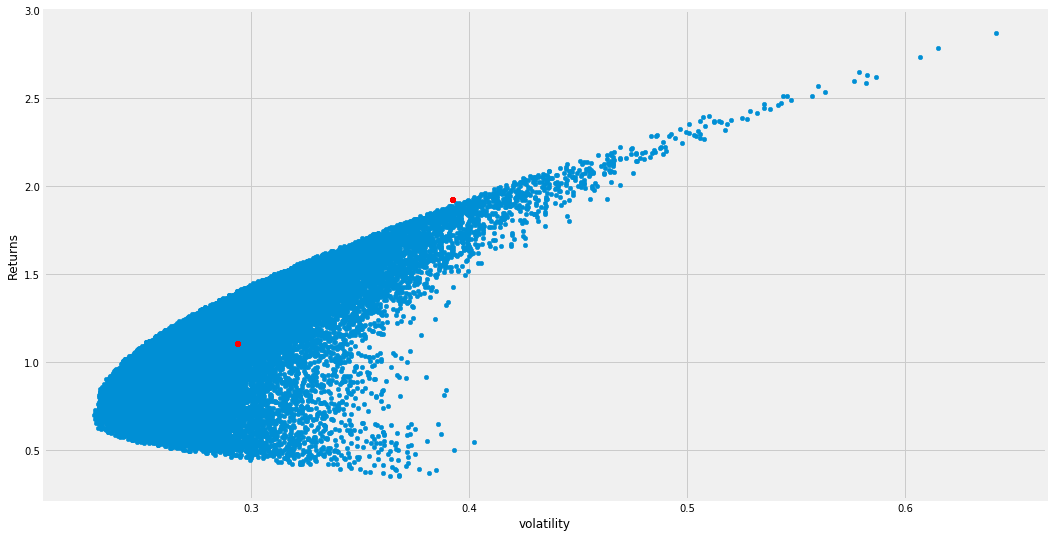

In [50]:
#Plotting the efficient frontier
ports = pd.DataFrame({'Returns' : p_ret, 'volatility' :p_vol})
ports.plot(x='volatility', y ='Returns', kind='scatter',figsize=(16,9))
plt.scatter(x=0.3924335279972146,y=1.9179350249768252,color="Red",marker='+')
plt.scatter(x=0.294,y=1.1,color="Red",marker='+')
plt.show()

In [51]:
SR_idx=np.argmax(p_SR)
wt=p_wt[SR_idx]
wt

array([0.28515626, 0.38053745, 0.22547437, 0.00953321, 0.0992987 ])

In [52]:
i = 0
while i < len(my_stocks):
    print('Stock : %s : %2.2f'%(my_stocks[i],(p_wt[SR_idx][i]*100)))
    i += 1
print('\nVolatility :',p_vol[SR_idx])
print('Return :',p_ret[SR_idx])

Stock : MHSML : 28.52
Stock : PAPERPROC : 38.05
Stock : RDFOOD : 22.55
Stock : PEOPLESINS : 0.95
Stock : PRIMEINSUR : 9.93

Volatility : 0.35061189125814834
Return : 1.7049140424404252


In [53]:
0.3924335279972146/1.9179350249768252

0.20461252487005208

In [54]:
0.2940/1.1

0.2672727272727272

In [55]:
prices=marge_df_by_col_name('close','2021-06-13','2021-06-13',*my_stocks).values
prices=prices.tolist()
prices[0][0]

19.3

In [56]:
def stock_cost(p):
    stocks=[]
    cost=[]
    inv_target=[]
    for i in range(0,len(my_stocks)):
        inv=p*wt[i]
        #print(inv)
        hs=inv/prices[0][i]
        hs=round(hs)
        #print(hs)
        if hs < 1:
            hs = 1
        c=hs*prices[0][i]
        stocks.append(hs)
        cost.append(c)
        inv_target.append(inv)
    return stocks,cost,inv_target

In [57]:
stock_cost(7000)[1]

[1987.9, 2657.6000000000004, 1568.0, 47.7, 690.8]

In [58]:
my_stocks
shares=stock_cost(7000)[0]
shares
my_stocks

['MHSML', 'PAPERPROC', 'RDFOOD', 'PEOPLESINS', 'PRIMEINSUR']

In [59]:
def get_port_daily_return(sdate,edate,shares,my_stocks):
    #print(my_stocks)
    mult_df = marge_df_by_col_name('close','2021-06-13','2022-05-05',*my_stocks)
    num_cols=len(mult_df.columns)
    i=0
    while i < num_cols:
        mult_df[my_stocks[i]]=mult_df[my_stocks[i]].apply(lambda x: x*shares[i])
        i += 1
    #create a new column with the sums of all stocks named Total
    mult_df['Total']= mult_df.iloc[:,0:num_cols].sum(axis=1)
    #Add column for portfolio daily return
    mult_df['daily_return'] = (mult_df['Total']/mult_df['Total'].shift(1))-1
    
    return mult_df

In [60]:
Time_series=get_port_daily_return('2021-06-13','2022-05-05',shares,my_stocks)
Time_series

,MHSML,PAPERPROC,RDFOOD,PEOPLESINS,PRIMEINSUR,Total,daily_return
date,,,,,,,
2021-06-13,1987.9,2657.6,1568.0,47.7,690.8,6952.0,NaN
2021-06-14,1936.4,2914.3,1582.7,47.6,701.8,7182.8,0.033199
2021-06-15,1926.1,3201.2,1631.7,48.7,734.8,7542.5,0.050078
2021-06-16,1895.2,3518.3,1710.1,50.8,745.8,7920.2,0.050076
2021-06-17,1864.3,3865.6,1680.7,51.0,732.6,8194.2,0.034595
...,...,...,...,...,...,...,...
2022-04-25,3687.4,35439.7,2778.3,56.7,944.9,42907.0,-0.039224
2022-04-26,3656.5,37765.1,2783.2,57.5,943.8,45206.1,0.053583
2022-04-27,3718.3,37085.6,2768.5,56.8,933.9,44563.1,-0.014224


In [61]:
from datetime import datetime
from datetime import timedelta
from statsmodels.tsa.seasonal import STL

In [62]:
m = pd.to_datetime(Time_series.index)

In [64]:
m

DatetimeIndex(['2021-06-13', '2021-06-14', '2021-06-15', '2021-06-16',
               '2021-06-17', '2021-06-20', '2021-06-21', '2021-06-22',
               '2021-06-23', '2021-06-24',
               ...
               '2022-04-18', '2022-04-19', '2022-04-20', '2022-04-21',
               '2022-04-24', '2022-04-25', '2022-04-26', '2022-04-27',
               '2022-04-28', '2022-05-05'],
              dtype='datetime64[ns]', name='date', length=215, freq=None)

In [65]:
Time_series.set_index(m, inplace=True)

In [67]:
t=Time_series['Total'].asfreq('D')
print(t.isnull().sum())
t=t.fillna(method="bfill")
t[0:12]

112


date
2021-06-13     6952.0
2021-06-14     7182.8
2021-06-15     7542.5
2021-06-16     7920.2
2021-06-17     8194.2
2021-06-18     8579.0
2021-06-19     8579.0
2021-06-20     8579.0
2021-06-21     9083.4
2021-06-22     9573.4
2021-06-23     9928.4
2021-06-24    10551.3
Freq: D, Name: Total, dtype: float64

In [69]:
Time_series[0:12]

,MHSML,PAPERPROC,RDFOOD,PEOPLESINS,PRIMEINSUR,Total,daily_return
date,,,,,,,
2021-06-13,1987.9,2657.6,1568.0,47.7,690.8,6952.0,NaN
2021-06-14,1936.4,2914.3,1582.7,47.6,701.8,7182.8,0.033199
2021-06-15,1926.1,3201.2,1631.7,48.7,734.8,7542.5,0.050078
2021-06-16,1895.2,3518.3,1710.1,50.8,745.8,7920.2,0.050076
2021-06-17,1864.3,3865.6,1680.7,51.0,732.6,8194.2,0.034595
2021-06-20,1874.6,4243.1,1705.2,49.9,706.2,8579.0,0.046960
2021-06-21,1977.6,4665.9,1695.4,49.3,695.2,9083.4,0.058795
2021-06-22,2049.7,5118.9,1680.7,47.6,676.5,9573.4,0.053945
2021-06-23,1946.7,5617.2,1675.8,45.2,643.5,9928.4,0.037082


In [70]:
STL=STL(t)
Result=STL.fit()

In [71]:
seasonal,trend,resid = Result.seasonal,Result.trend, Result.resid
t-(seasonal+trend)

date
2021-06-13    161.085808
2021-06-14    -61.294197
2021-06-15    -81.472560
2021-06-16     -8.186723
2021-06-17    -60.565618
                 ...    
2022-05-01    -83.513508
2022-05-02    732.089314
2022-05-03   -279.249477
2022-05-04   -319.657379
2022-05-05    145.288746
Freq: D, Length: 327, dtype: float64

In [72]:
t[0:10]

date
2021-06-13    6952.0
2021-06-14    7182.8
2021-06-15    7542.5
2021-06-16    7920.2
2021-06-17    8194.2
2021-06-18    8579.0
2021-06-19    8579.0
2021-06-20    8579.0
2021-06-21    9083.4
2021-06-22    9573.4
Freq: D, Name: Total, dtype: float64

In [73]:
Time_series

,MHSML,PAPERPROC,RDFOOD,PEOPLESINS,PRIMEINSUR,Total,daily_return
date,,,,,,,
2021-06-13,1987.9,2657.6,1568.0,47.7,690.8,6952.0,NaN
2021-06-14,1936.4,2914.3,1582.7,47.6,701.8,7182.8,0.033199
2021-06-15,1926.1,3201.2,1631.7,48.7,734.8,7542.5,0.050078
2021-06-16,1895.2,3518.3,1710.1,50.8,745.8,7920.2,0.050076
2021-06-17,1864.3,3865.6,1680.7,51.0,732.6,8194.2,0.034595
...,...,...,...,...,...,...,...
2022-04-25,3687.4,35439.7,2778.3,56.7,944.9,42907.0,-0.039224
2022-04-26,3656.5,37765.1,2783.2,57.5,943.8,45206.1,0.053583
2022-04-27,3718.3,37085.6,2768.5,56.8,933.9,44563.1,-0.014224


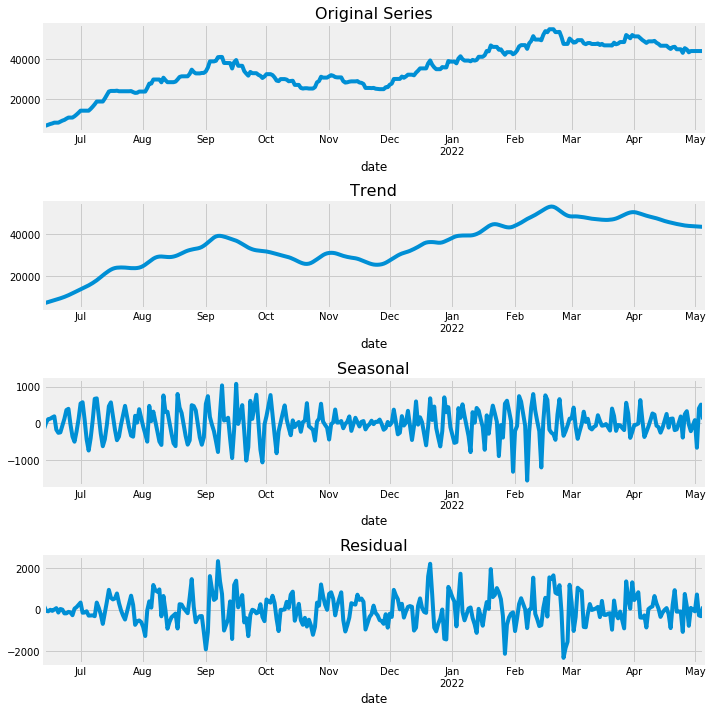

In [74]:
plt.figure(figsize=(10,10))

plt.subplot(4,1,1)
t.plot()
plt.title('Original Series', fontsize=16)

plt.subplot(4,1,2)
trend.plot()
plt.title('Trend', fontsize=16)

plt.subplot(4,1,3)
seasonal.plot()
plt.title('Seasonal', fontsize=16)

plt.subplot(4,1,4)
resid.plot()
plt.title('Residual', fontsize=16)

plt.tight_layout()

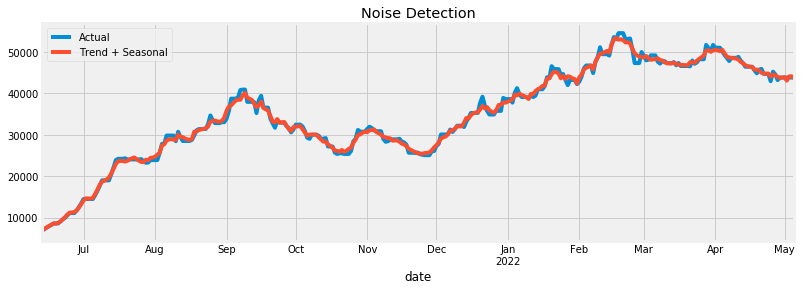

In [84]:
estimated = trend + seasonal
plt.figure(figsize=(12,4))
t.plot(label='Actual')
estimated.plot(label='Trend + Seasonal')
plt.title('Noise Detection')
plt.legend()
plt.show()

In [85]:
def adfuller_test(sales):
    result= adfuller(sales)
    labels = ["ADF Test Statistics","p-value","#Lags Used","Number of Observations Used"]
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
        else:
            print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [86]:
adfuller_test(estimated)

ADF Test Statistics : -2.055375732440061
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
p-value : 0.26283244569107855
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
#Lags Used : 17
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
Number of Observations Used : 309
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [87]:
first_diff=estimated.diff(1)[1:]
adfuller_test(first_diff)

ADF Test Statistics : -3.617766951978844
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
p-value : 0.005430306386678053
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
#Lags Used : 17
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
Number of Observations Used : 308
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


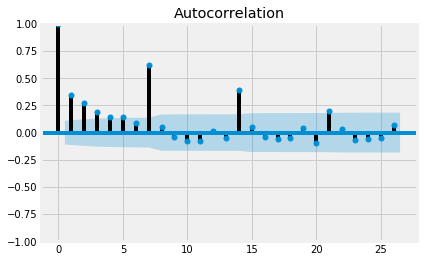

In [151]:
acf_plot=plot_acf(first_diff[0:320])

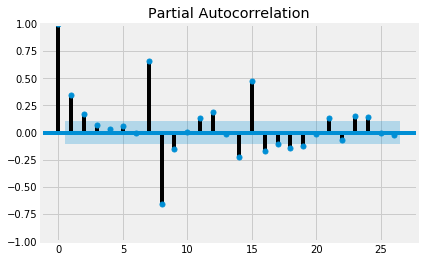

In [152]:
pacf_plot = plot_pacf(first_diff[0:320])

In [225]:
from statsmodels.tsa.arima.model import ARIMA
my_order=(3,1,3)# My time series is seasonal thats why i am setting my normal AR,MA=0, and 1 differencing helped me get my time series stationary
my_seasonal_order=(1,1,1,8) # my time series is yearly and Pacf, Acf both has a significant lag at point 3 and seasonal lag of MA in (1,0,1,3 )is insignificant, so(1,0,0,3)
model = SARIMAX(estimated[0:320], order=my_order,seasonal_order=my_seasonal_order)

In [226]:
model_fit = model.fit()

In [227]:
print(model_fit.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  320
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 8)   Log Likelihood               -2372.496
Date:                             Fri, 06 May 2022   AIC                           4762.993
Time:                                     21:26:31   BIC                           4796.651
Sample:                                 06-13-2021   HQIC                          4776.446
                                      - 04-28-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2164      0.111      1.956      0.050      -0.000       0.433
ar.L2         -0.0991      

In [248]:
predictions=model_fit.forecast(7)
predictions

2022-04-29    44168.486141
2022-04-30    44143.161307
2022-05-01    44207.971699
2022-05-02    44245.559449
2022-05-03    44455.625499
2022-05-04    44405.367823
2022-05-05    44493.263781
Freq: D, Name: predicted_mean, dtype: float64

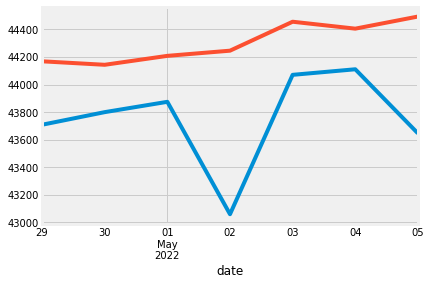

In [250]:
estimated[320:].plot()
predictions.plot()

In [252]:
residuals=estimated[320:]-predictions
residuals

date
2022-04-29    -460.374260
2022-04-30    -343.551103
2022-05-01    -333.458191
2022-05-02   -1186.648763
2022-05-03    -385.376022
2022-05-04    -294.710443
2022-05-05    -847.552527
Freq: D, dtype: float64

Text(0, 0.5, 'Error')

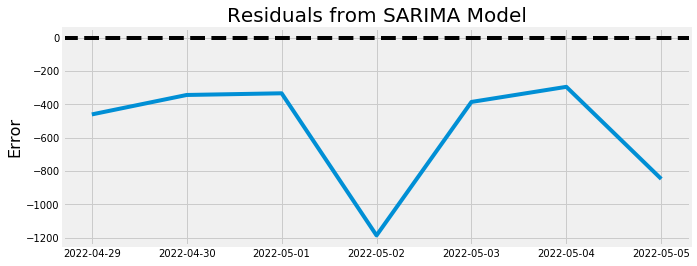

In [253]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [257]:
print('Mean Absolute Percent Error :',round(np.mean(abs(residuals/estimated[320:])),4))

Mean Absolute Percent Error : 0.0126


In [258]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 632.7960266918133


In [268]:
Rolling_Prediction=estimated[320:].copy()
for train_end in estimated[320:].index:
    train_data=estimated[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()
    pred=model_fit.forecast()
    Rolling_Prediction[train_end]=pred
print(Rolling_Prediction)

date
2022-04-29    44168.486141
2022-04-30    43462.164207
2022-05-01    43906.941245
2022-05-02    43755.300479
2022-05-03    43180.830075
2022-05-04    44459.971438
2022-05-05    44044.218900
Freq: D, dtype: float64


In [270]:
Rolling_Residuals=estimated[320:]-Rolling_Prediction
Rolling_Residuals

date
2022-04-29   -460.374260
2022-04-30    337.445996
2022-05-01    -32.427737
2022-05-02   -696.389792
2022-05-03    889.419402
2022-05-04   -349.314058
2022-05-05   -398.507645
Freq: D, dtype: float64

Text(0, 0.5, 'Error')

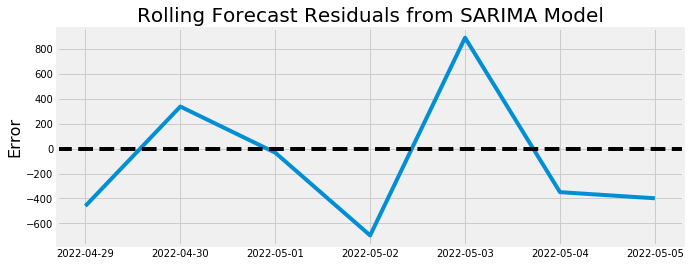

In [271]:
plt.figure(figsize=(10,4))
plt.plot(Rolling_Residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

In [297]:
from scipy.signal import savgol_filter
yhat = savgol_filter(Rolling_Prediction, 3, 1)
yhat

array([43976.6363121 , 43845.86386429, 43708.13531036, 43614.35726613,
       43798.70066367, 43895.00680406, 44326.70121661])

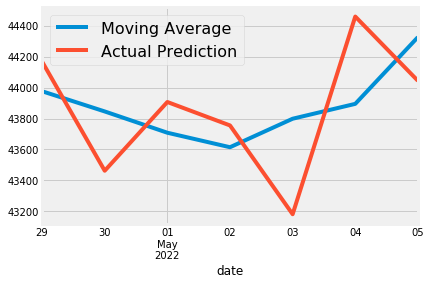

In [309]:
rng = pd.date_range(start="2022-04-29",end="2022-05-05",freq='D')
rolling_predictions1 = pd.Series(yhat, index=rng)
rolling_predictions1.plot()
Rolling_Prediction.plot()
plt.legend(('Moving Average', 'Actual Prediction'), fontsize=16)

In [305]:
print('Mean Absolute Percent Error :',round(np.mean(abs((estimated[320:]-rolling_predictions1)/estimated[320:])),4))

Mean Absolute Percent Error : 0.0072


In [301]:
print('Root Mean Squared Error:', np.sqrt(np.mean((estimated[320:]-rolling_predictions1)**2)))

Root Mean Squared Error: 376.91200873533234


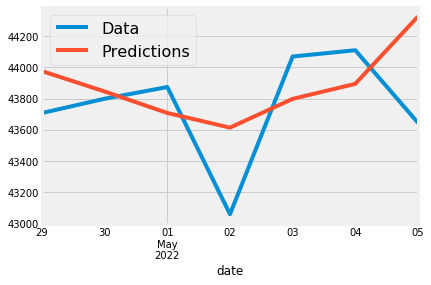

In [302]:
estimated[320:].plot()
rolling_predictions1.plot()
plt.legend(('Data', 'Predictions'), fontsize=16)

Text(0, 0.5, 'Error')

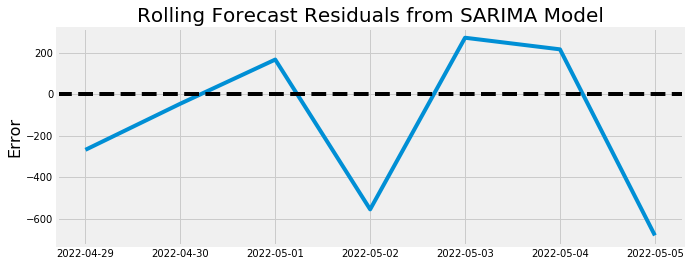

In [308]:
plt.figure(figsize=(10,4))
plt.plot(estimated[320:]-rolling_predictions1)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)